In [1]:
# importing the required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics

In [2]:
# reading the data
data = pd.read_csv("rainfall.csv")
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [4]:
data.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data["SUBDIVISION"].value_counts()

SUBDIVISION
WEST MADHYA PRADESH                   115
EAST RAJASTHAN                        115
COASTAL KARNATAKA                     115
TAMIL NADU                            115
RAYALSEEMA                            115
TELANGANA                             115
COASTAL ANDHRA PRADESH                115
CHHATTISGARH                          115
VIDARBHA                              115
MATATHWADA                            115
MADHYA MAHARASHTRA                    115
KONKAN & GOA                          115
SAURASHTRA & KUTCH                    115
GUJARAT REGION                        115
EAST MADHYA PRADESH                   115
KERALA                                115
WEST RAJASTHAN                        115
SOUTH INTERIOR KARNATAKA              115
JAMMU & KASHMIR                       115
HIMACHAL PRADESH                      115
PUNJAB                                115
HARYANA DELHI & CHANDIGARH            115
UTTARAKHAND                           115
WEST UTTAR PRADESH    

In [7]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
means = data[numeric_cols].mean()
means

YEAR       1958.218659
JAN          18.957320
FEB          21.805325
MAR          27.359197
APR          43.127432
MAY          85.745417
JUN         230.234444
JUL         347.214334
AUG         290.263497
SEP         197.361922
OCT          95.507009
NOV          39.866163
DEC          18.870580
ANNUAL     1411.008900
Jan-Feb      40.747786
Mar-May     155.901753
Jun-Sep    1064.724769
Oct-Dec     154.100487
dtype: float64

In [8]:
# filling na values with mean
data[numeric_cols] = data[numeric_cols].fillna(means)
data.head(3)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6


In [9]:
data.isnull().any()

SUBDIVISION    False
YEAR           False
JAN            False
FEB            False
MAR            False
APR            False
MAY            False
JUN            False
JUL            False
AUG            False
SEP            False
OCT            False
NOV            False
DEC            False
ANNUAL         False
Jan-Feb        False
Mar-May        False
Jun-Sep        False
Oct-Dec        False
dtype: bool

In [10]:
data.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1946, 1947, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       1943, 1944, 1945, 1948, 1909], dtype=int64)

In [11]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.569044,35.896396,46.925176,67.798192,123.189974,234.568120,269.310313,188.678707,135.309591,99.434452,68.593545,42.318098,900.986632,59.265023,201.096692,706.881054,166.678751
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.475000,175.900000,156.150000,100.600000,14.600000,0.700000,0.100000,806.450000,4.100000,24.200000,574.375000,34.200000
50%,1958.000000,6.000000,6.700000,7.900000,15.700000,36.700000,138.900000,284.900000,259.500000,174.100000,65.750000,9.700000,3.100000,1125.450000,19.300000,75.200000,882.250000,98.800000
75%,1987.000000,22.125000,26.800000,31.225000,49.825000,96.825000,304.950000,418.225000,377.725000,265.725000,148.300000,45.825000,17.700000,1635.100000,50.300000,196.900000,1287.550000,212.600000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [12]:
data.shape

(4116, 19)

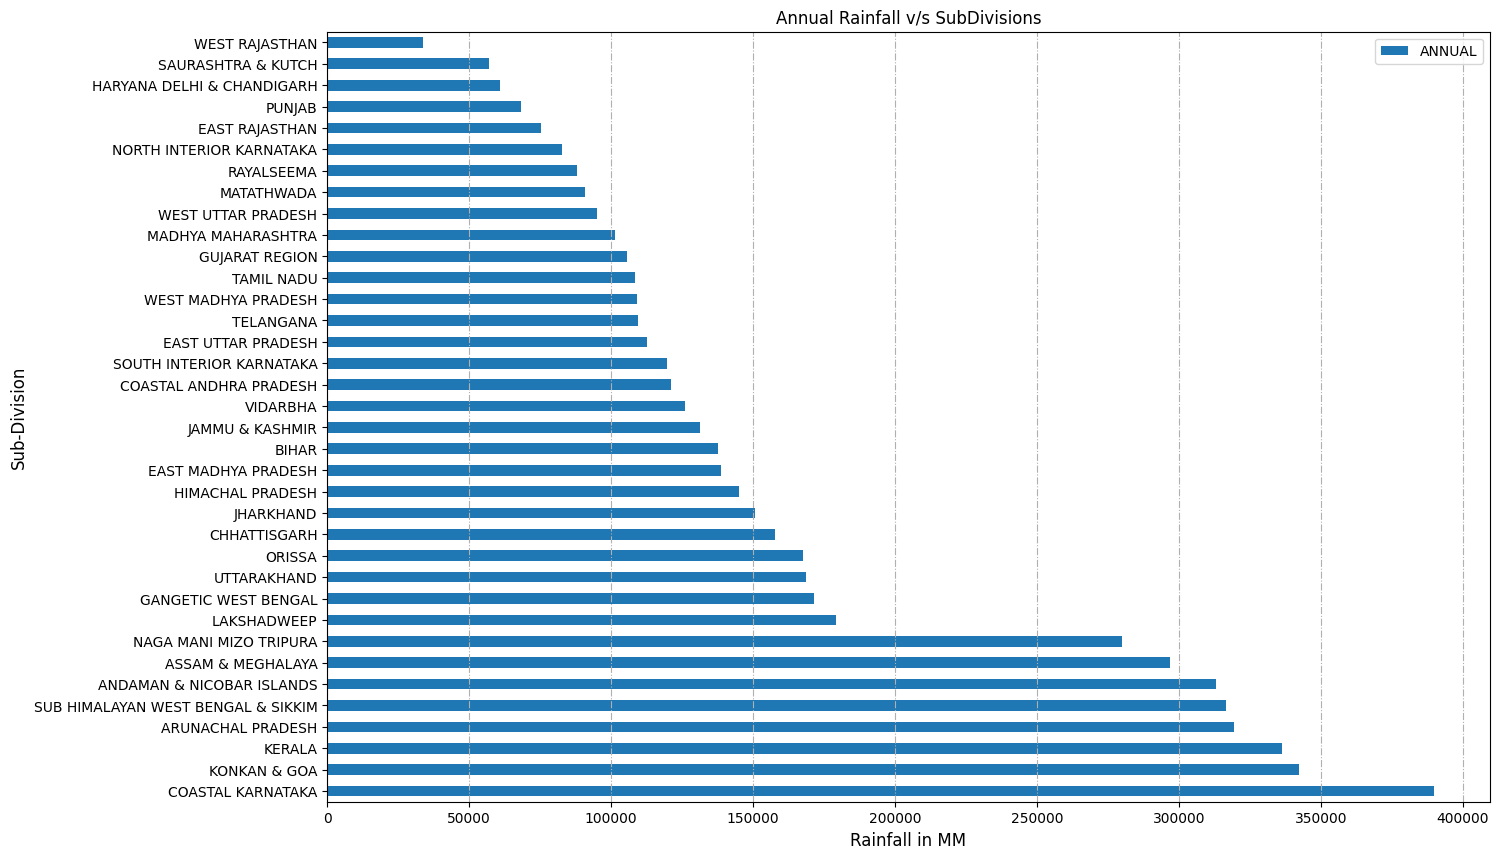

In [13]:
data[["SUBDIVISION", "ANNUAL"]].groupby("SUBDIVISION").sum().sort_values(
    by="ANNUAL", ascending=False
).plot(kind="barh", stacked=True, figsize=(15, 10))

plt.xlabel("Rainfall in MM", size=12)
plt.ylabel("Sub-Division", size=12)
plt.title("Annual Rainfall v/s SubDivisions")
plt.grid(axis="x", linestyle="-.")
plt.show()

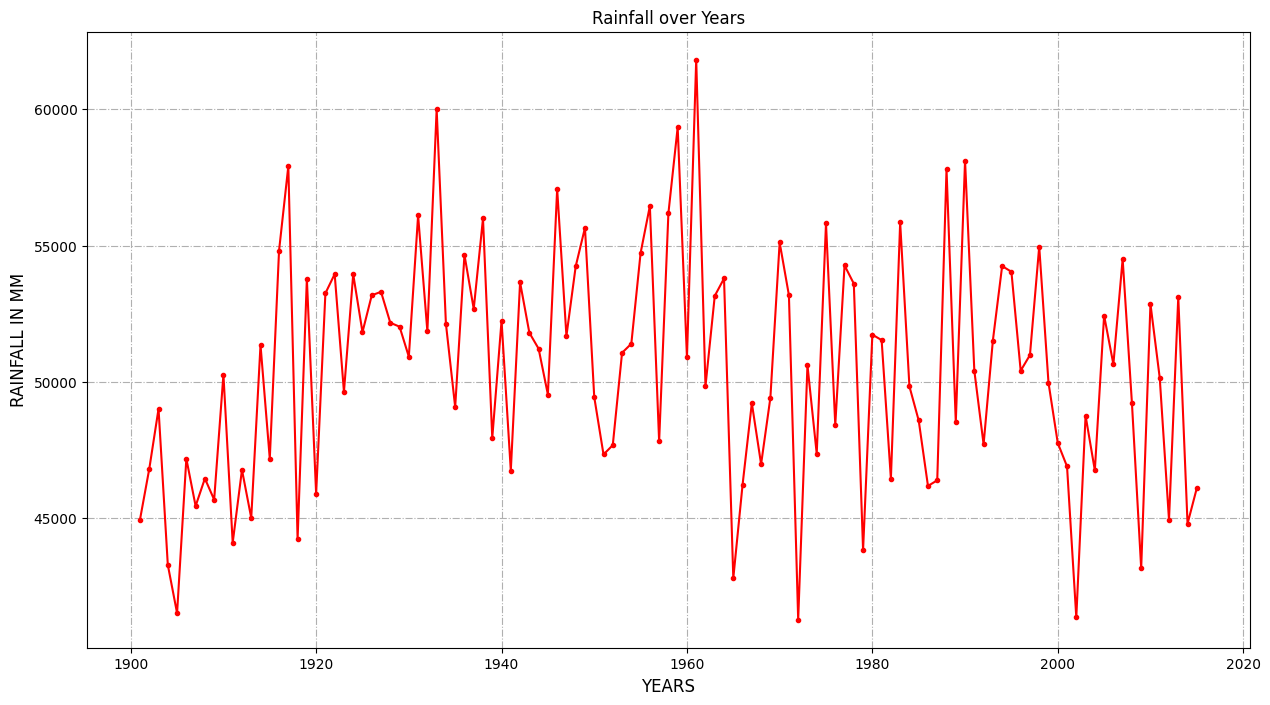

In [14]:
plt.figure(figsize=(15,8))

data.groupby("YEAR").sum()['ANNUAL'].plot(kind="line",color="r",marker=".")

plt.xlabel("YEARS",size=12)
plt.ylabel("RAINFALL IN MM",size=12)
plt.grid(axis="both",linestyle="-.")
plt.title("Rainfall over Years")
plt.show()

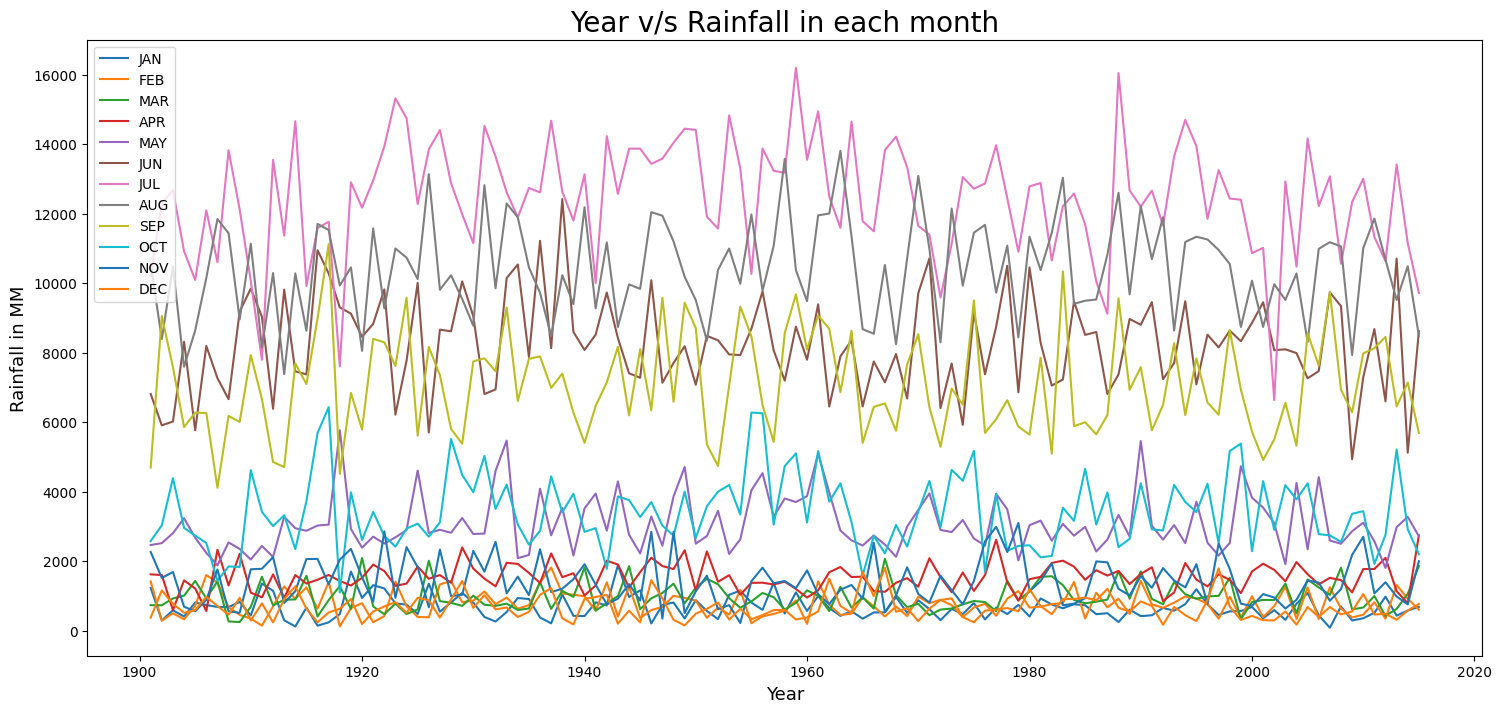

In [15]:
data[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP',
      'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(kind="line",figsize=(18,8))

plt.xlabel("Year",size=13)
plt.ylabel("Rainfall in MM",size=13)
plt.title("Year v/s Rainfall in each month",size=20)
plt.show()

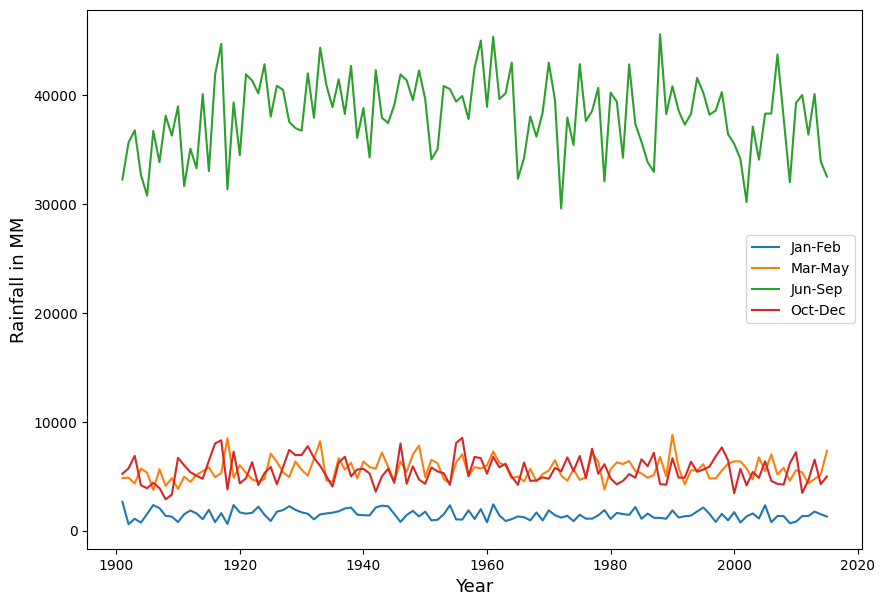

In [16]:
data[["YEAR", "Jan-Feb", "Mar-May", "Jun-Sep", "Oct-Dec"]].groupby("YEAR").sum().plot(
    figsize=(10, 7)
)

plt.xlabel("Year", size=13)
plt.ylabel("Rainfall in MM", size=13)
plt.show()

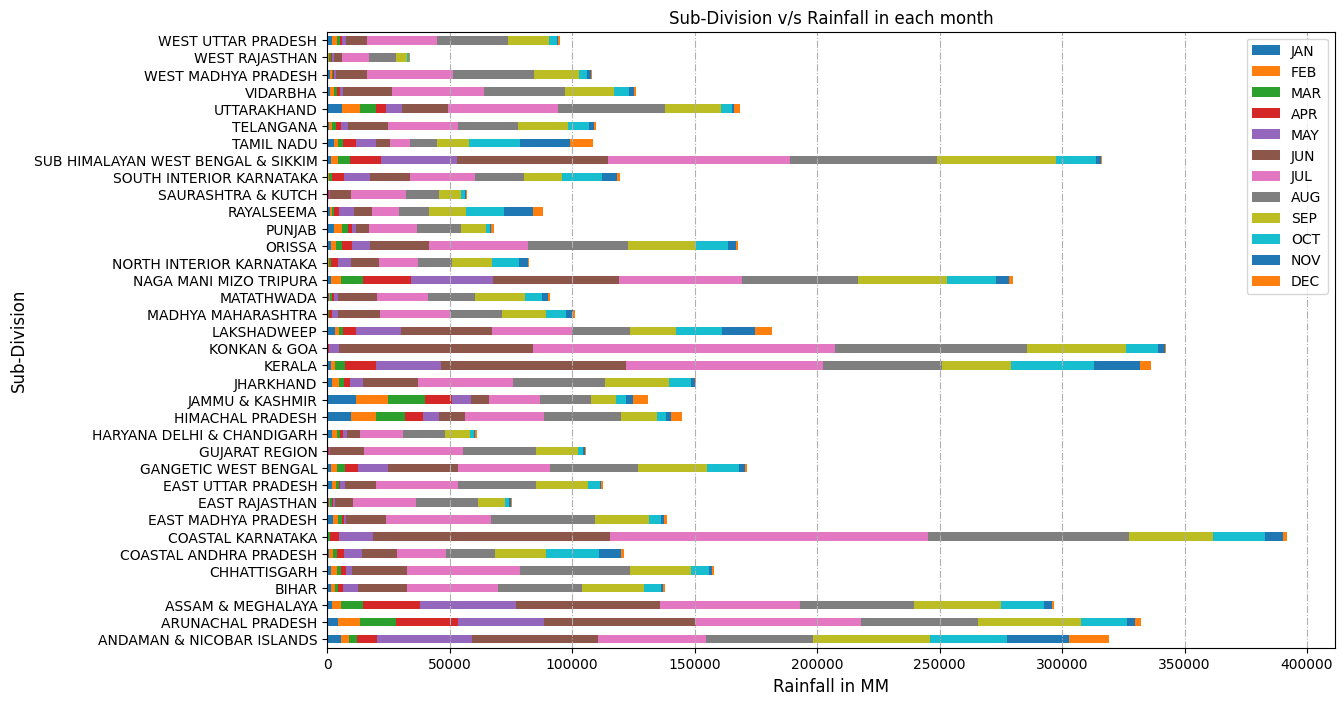

In [17]:
data[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").sum().plot(kind="barh",stacked=True,figsize=(13,8))

plt.title("Sub-Division v/s Rainfall in each month")
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.grid(axis="x",linestyle="-.")
plt.show()

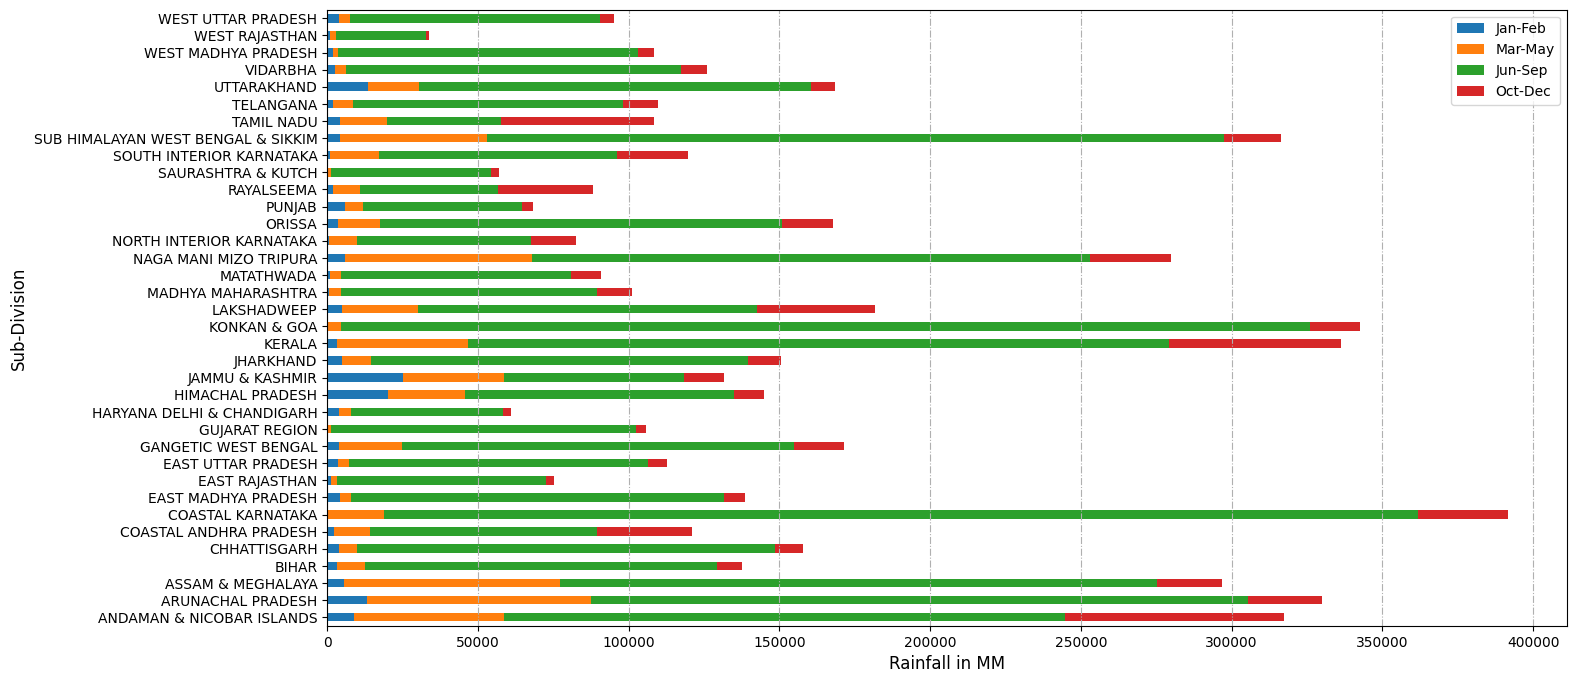

In [18]:
data[["SUBDIVISION", "Jan-Feb", "Mar-May", "Jun-Sep", "Oct-Dec"]].groupby(
    "SUBDIVISION"
).sum().plot(kind="barh", stacked=True, figsize=(16, 8))

plt.xlabel("Rainfall in MM", size=12)
plt.ylabel("Sub-Division", size=12)
plt.grid(axis="x", linestyle="-.")
plt.show()

In [19]:
# analysis of rainfall data of west bengal
WestBengal = data.loc[((data['SUBDIVISION'] == 'GANGETIC WEST BENGAL'))]
WestBengal.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
552,GANGETIC WEST BENGAL,1901,37.1,58.4,3.9,64.1,121.7,198.0,280.8,275.7,313.5,51.1,83.4,0.0,1487.6,95.5,189.7,1068.0,134.4
553,GANGETIC WEST BENGAL,1902,0.0,1.2,44.2,103.8,161.6,140.9,347.8,264.8,230.5,32.5,10.4,9.9,1347.7,1.2,309.6,984.0,52.9
554,GANGETIC WEST BENGAL,1903,17.5,24.6,37.3,30.6,78.5,201.7,179.6,277.6,300.7,198.0,8.2,0.0,1354.3,42.1,146.4,959.6,206.2
555,GANGETIC WEST BENGAL,1904,0.1,23.9,35.6,17.5,160.2,286.7,435.3,241.7,142.8,35.1,4.1,0.1,1383.1,24.0,213.3,1106.4,39.3
556,GANGETIC WEST BENGAL,1905,30.9,49.6,84.7,84.9,156.8,70.9,525.5,263.6,287.6,107.3,0.0,5.2,1666.9,80.5,326.3,1147.6,112.6


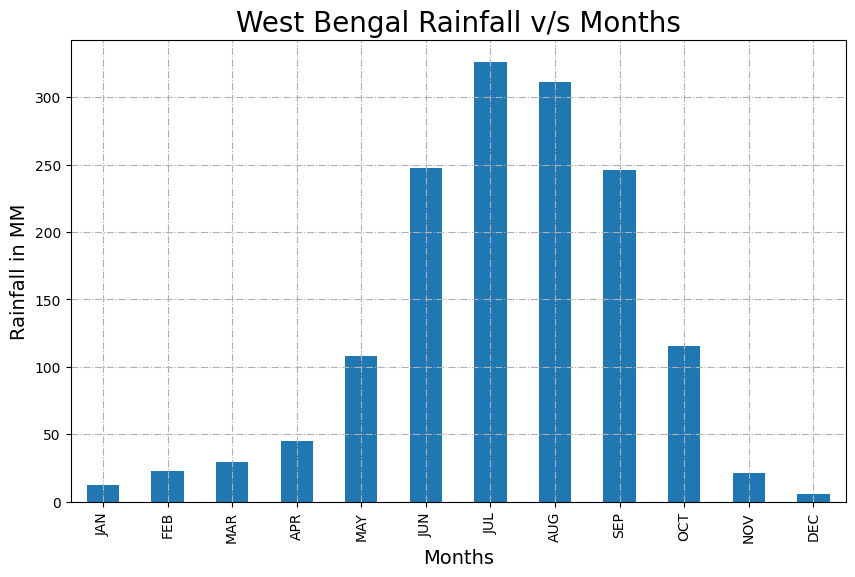

In [20]:
plt.figure(figsize=(10,6))
WestBengal[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN','JUL','AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot(kind="bar",width=0.5,linewidth=2)
plt.title("West Bengal Rainfall v/s Months",size=20)
plt.xlabel("Months",size=14)
plt.ylabel("Rainfall in MM",size=14)
plt.grid(axis="both",linestyle="-.")
plt.show()

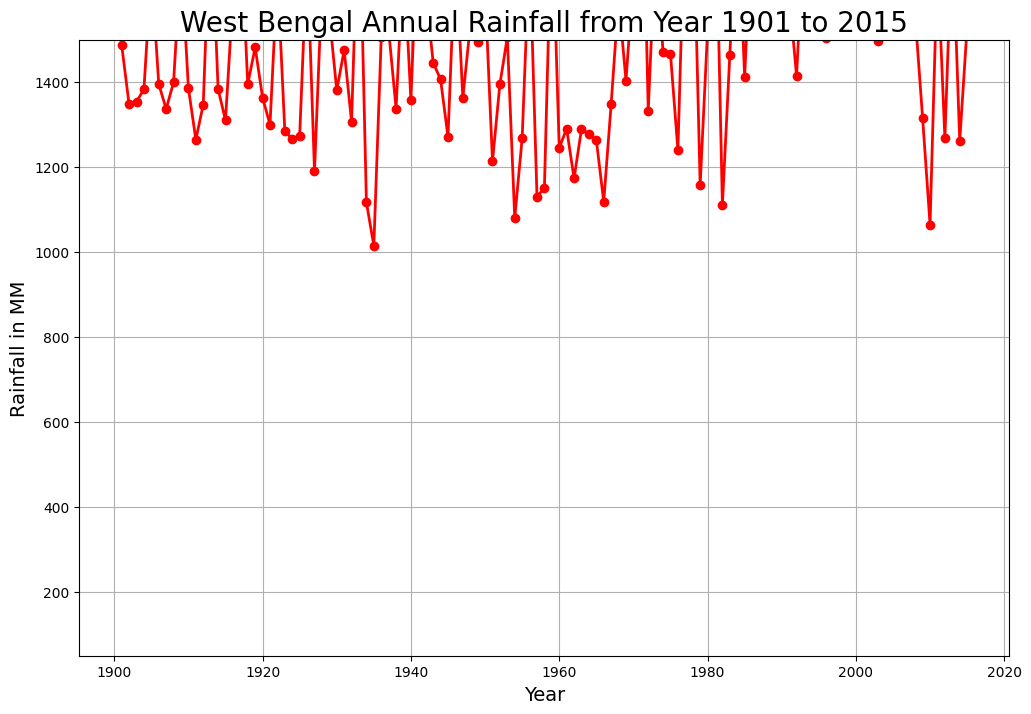

In [21]:
annual_mean = WestBengal.groupby("YEAR")['ANNUAL'].mean()

# Plot the data
annual_mean.plot(ylim=(50,1500), color='r', marker='o', linestyle='-', linewidth=2, figsize=(12,8))
plt.xlabel('Year', size=14)
plt.ylabel('Rainfall in MM', size=14)
plt.title('West Bengal Annual Rainfall from Year 1901 to 2015', size=20)
plt.grid()
plt.show()

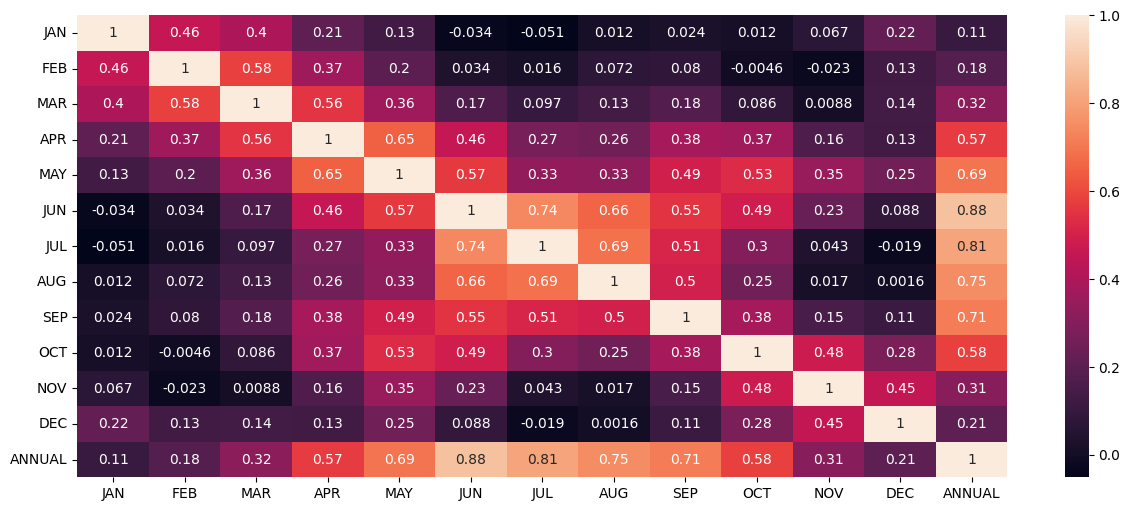

In [22]:
plt.figure(figsize=(15,6))
sns.heatmap(data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()

In [23]:
data["SUBDIVISION"].nunique()

36

In [24]:
group = data.groupby("SUBDIVISION")[
    ["YEAR", "JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
]
data=group.get_group(('GANGETIC WEST BENGAL'))
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
552,1901,37.1,58.4,3.9,64.1,121.7,198.0,280.8,275.7,313.5,51.1,83.4,0.0
553,1902,0.0,1.2,44.2,103.8,161.6,140.9,347.8,264.8,230.5,32.5,10.4,9.9
554,1903,17.5,24.6,37.3,30.6,78.5,201.7,179.6,277.6,300.7,198.0,8.2,0.0
555,1904,0.1,23.9,35.6,17.5,160.2,286.7,435.3,241.7,142.8,35.1,4.1,0.1
556,1905,30.9,49.6,84.7,84.9,156.8,70.9,525.5,263.6,287.6,107.3,0.0,5.2


In [25]:
df = data.melt(["YEAR"]).reset_index()
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,37.1
1,1,1902,JAN,0.0
2,2,1903,JAN,17.5
3,3,1904,JAN,0.1
4,4,1905,JAN,30.9


In [26]:
df = df[["YEAR", "variable", "value"]].reset_index().sort_values(by=["YEAR", "index"])
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,37.1
115,115,1901,FEB,58.4
230,230,1901,MAR,3.9
345,345,1901,APR,64.1
460,460,1901,MAY,121.7


In [27]:
df.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [28]:
df.columns = ["Index", "Year", "Month", "Avg_Rainfall"]
df.head()

,Index,Year,Month,Avg_Rainfall
0,0,1901,JAN,37.1
115,115,1901,FEB,58.4
230,230,1901,MAR,3.9
345,345,1901,APR,64.1
460,460,1901,MAY,121.7


In [29]:
Month_map = {
    "JAN": 1,
    "FEB": 2,
    "MAR": 3,
    "APR": 4,
    "MAY": 5,
    "JUN": 6,
    "JUL": 7,
    "AUG": 8,
    "SEP": 9,
    "OCT": 10,
    "NOV": 11,
    "DEC": 12,
}
df["Month"] = df["Month"].map(Month_map)
df.head(12)

,Index,Year,Month,Avg_Rainfall
0,0,1901,1,37.1
115,115,1901,2,58.4
230,230,1901,3,3.9
345,345,1901,4,64.1
460,460,1901,5,121.7
575,575,1901,6,198.0
690,690,1901,7,280.8
805,805,1901,8,275.7
920,920,1901,9,313.5
1035,1035,1901,10,51.1


In [30]:
df.drop(columns="Index", inplace=True)
df.head(2)

,Year,Month,Avg_Rainfall
0,1901,1,37.1
115,1901,2,58.4


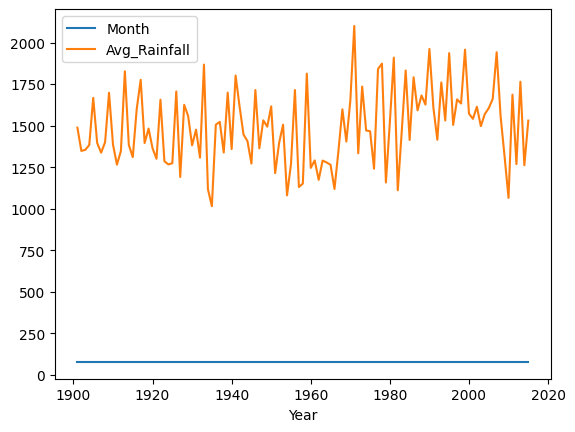

In [31]:
df.groupby("Year").sum().plot()
plt.show()

In [32]:
X = np.asanyarray(df[["Year", "Month"]]).astype("int")
y = np.asanyarray(df["Avg_Rainfall"]).astype("int")
print(X.shape)
print(y.shape)

(1380, 2)
(1380,)


In [33]:
# splitting the dataset into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

## Liner Regression Model

In [34]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [35]:
# predicting 
y_train_predict=LR.predict(X_train)
y_test_predict=LR.predict(X_test)

In [36]:
print("-------Test Data--------")
print("MAE:", metrics.mean_absolute_error(y_test, y_test_predict))
print("MSE:", metrics.mean_squared_error(y_test, y_test_predict))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print("MAE:", metrics.mean_absolute_error(y_train, y_train_predict))
print("MSE:", metrics.mean_squared_error(y_train, y_train_predict))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(LR.score(X_train, y_train), 3) * 100)
print("-----Testing Accuracy--------")
print(round(LR.score(X_test, y_test), 3) * 100)

-------Test Data--------
MAE: 112.48095747510331
MSE: 18724.665339462954
RMSE: 136.83809900558745

-------Train Data--------
MAE: 104.52433141377341
MSE: 16395.69310267598
RMSE: 128.0456680355723

-----Training Accuracy-------
4.6
-----Testing Accuracy--------
2.9000000000000004


## Lasso Model

In [37]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# create a lasso object
lasso = Lasso(max_iter=100000)

# check for best alpha value using GridSearch
parameter = {
    "alpha": [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]
}
lasso_regressor = GridSearchCV(lasso, parameter, scoring="neg_mean_squared_error", cv=5)

lasso_regressor.fit(X_train, y_train)

c:\Users\meizh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.997e+06, tolerance: 1.341e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\meizh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.340e+06, tolerance: 1.348e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\meizh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

GridSearchCV(cv=5, estimator=Lasso(max_iter=100000),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10.0,
                                   100.0, 1000.0, 10000.0, 100000.0, 1000000.0,
                                   10000000.0]},
             scoring='neg_mean_squared_error')

In [38]:
print("Best Parameter for Lasso:", lasso_regressor.best_estimator_)

Best Parameter for Lasso: Lasso(alpha=1, max_iter=100000)


In [39]:
lasso = Lasso(alpha=100.0, max_iter=100000)
# fit into the object
lasso.fit(X_train, y_train)

Lasso(alpha=100.0, max_iter=100000)

In [40]:
# predicting 
y_train_predict=lasso.predict(X_train)
y_test_predict=lasso.predict(X_test)

In [41]:
from sklearn import metrics
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(lasso.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(lasso.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 116.92849331199106
MSE: 19307.053224103405
RMSE: 138.94982268467783

-------Train Data--------
MAE: 110.62353926483522
MSE: 17186.266505527718
RMSE: 131.096401573528

-----Training Accuracy-------
0.1
-----Testing Accuracy--------
-0.1


## Ridge Model

In [42]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {
    "alpha": [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]
}
ridge_regressor = GridSearchCV(
    ridge, parameters, scoring="neg_mean_squared_error", cv=5
)
ridge_regressor.fit(X_train, y_train)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)
print("Best Parameter for Ridge:", ridge_regressor.best_estimator_)

{'alpha': 100}
-16480.535926086523
Best Parameter for Ridge: Ridge(alpha=100)


In [43]:
ridge=Ridge(alpha=100.0)

# fit into the object
ridge.fit(X_train,y_train)

Ridge(alpha=100.0)

In [44]:
# predicting the train and test values
y_train_predict = ridge.predict(X_train)
y_test_predict = ridge.predict(X_test)

In [45]:
from sklearn import metrics

print("-------Test Data--------")
print("MAE:", metrics.mean_absolute_error(y_test, y_test_predict))
print("MSE:", metrics.mean_squared_error(y_test, y_test_predict))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print("MAE:", metrics.mean_absolute_error(y_train, y_train_predict))
print("MSE:", metrics.mean_squared_error(y_train, y_train_predict))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(ridge.score(X_train, y_train), 3) * 100)
print("-----Testing Accuracy--------")
print(round(ridge.score(X_test, y_test), 3) * 100)

-------Test Data--------
MAE: 112.51589457386932
MSE: 18723.016377924054
RMSE: 136.83207364475646

-------Train Data--------
MAE: 104.56880219898291
MSE: 16395.750428679537
RMSE: 128.04589188521254

-----Training Accuracy-------
4.6
-----Testing Accuracy--------
2.9000000000000004


## SVM Model

In [46]:
from sklearn import preprocessing, svm

svm_regr = svm.SVC(kernel="rbf")
svm_regr.fit(X_train, y_train)

y_test_predict = svm_regr.predict(X_test)
y_train_predict = svm_regr.predict(X_train)

In [47]:
from sklearn import metrics
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))


print("\n-----Training Accuracy-------")
print(round(svm_regr.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(svm_regr.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 127.32850241545894
MSE: 35504.07729468599
RMSE: 188.4252565201544

-------Train Data--------
MAE: 122.24844720496894
MSE: 32139.879917184266
RMSE: 179.27598812218068

-----Training Accuracy-------
10.0
-----Testing Accuracy--------
11.1


## Random Forest Model

In [48]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(
    max_depth=100,
    max_features="sqrt",
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=800,
)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)

In [49]:
y_train_predict = random_forest_model.predict(X_train)
y_test_predict = random_forest_model.predict(X_test)

In [50]:
print("-------Test Data--------")
print("MAE:", metrics.mean_absolute_error(y_test, y_test_predict))
print("MSE:", metrics.mean_squared_error(y_test, y_test_predict))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print("MAE:", metrics.mean_absolute_error(y_train, y_train_predict))
print("MSE:", metrics.mean_squared_error(y_train, y_train_predict))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 46.851895184548326
MSE: 4591.369858127362
RMSE: 67.75964771253878

-------Train Data--------
MAE: 34.6881833866429
MSE: 2694.433700833196
RMSE: 51.90793485425129


In [51]:
print("-----------Training Accuracy------------")
print(round(random_forest_model.score(X_train, y_train), 3) * 100)
print("-----------Testing Accuracy------------")
print(round(random_forest_model.score(X_test, y_test), 3) * 100)

-----------Training Accuracy------------
84.3
-----------Testing Accuracy------------
76.2


In [52]:
predicted = random_forest_model.predict([[2016, 11]])
predicted

array([44.34538825])